# The data set includes information when the free throw was taken during the game, who took the shoot and if it went in or not. There are over 600k free throws between 2006 and 2016.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

df = pd.read_csv('free_throws.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618019 entries, 0 to 618018
Data columns (total 11 columns):
end_result    618019 non-null object
game          618019 non-null object
game_id       618019 non-null float64
period        618019 non-null float64
play          618019 non-null object
player        618019 non-null object
playoffs      618019 non-null object
score         618019 non-null object
season        618019 non-null object
shot_made     618019 non-null int64
time          618019 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 51.9+ MB


# Question: How shooting percentage varies over time in a game?

# Firstly let's find the free throws percentage over time- number of seconds and minutes from the begining of the match

In [3]:
df['minute'] = df.time.apply(lambda x: int(x[:len(x)-3]))
df['sec'] = df.time.apply(lambda x: int(x[len(x)-2:]))
df['abs_min'] = 12 - df['minute']+12*(df.period -1)
df['abs_time'] = 60*(df.abs_min-1) + 60 - df['sec']

In [4]:
def group_values(df,minute):
    made = len(df[(df.abs_min == minute) & (df.shot_made == 1)])
    total = len(df[df.abs_min == minute])
    return np.true_divide(made,total)

minutes = range(int(max(df.abs_min)))

per_min = []
for minu in minutes:
    per_min.append(group_values(df,minu))

C:\Users\nuodi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


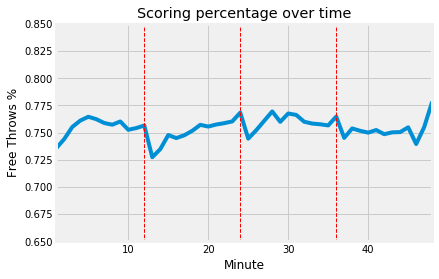

In [5]:
plt.plot(minutes,per_min)
plt.title('Scoring percentage over time')
plt.xlim([1,48])
plt.ylim([0.65,0.85])
plt.plot([12,12],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([24,24],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([36,36],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([48,48],[0,1], '--', linewidth = 1, color = 'r')
plt.xlabel('Minute')
plt.ylabel('Free Throws %')

Indicates:

. A NBA game is 48 minutes and 12 minuts each quarter

. Each vertical red dash line means a quarter of the game

# From above figure, it is obviously:

#1. At the beginning of each quarter, the shooting percentage is always worse
#2. At the end of a quarter, the shooting percentage is raising rapidly. Especially at the end of the game. however, the incerase is not significantly.

# Conclusion:

#1. The tempo of the game affects the shooting percentage, which resluts in a significant increase at the end of quarter and a worse shooting percentage at the beginning.

# Question: Is it the number of shots reduced lead to the shooting percentage increased?

# Now let's plot the number of shots over time

In [6]:
minutes_df = pd.DataFrame()
minutes_df['minutes'] = range(int(max(df.abs_min)))
minutes_df['shots'] = minutes_df.minutes.apply(lambda x: len(df[df.abs_min == x]))
minutes_df['players_num'] = minutes_df.minutes.apply(lambda x: len(np.unique(df.player[df.abs_min == x])))

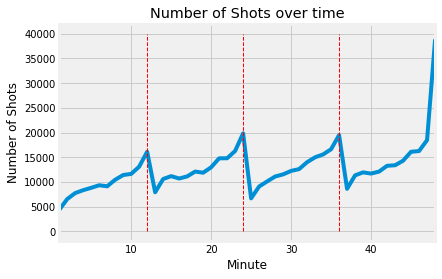

In [7]:
plt.plot(minutes_df['shots'])
plt.title('Number of Shots over time')
plt.ylabel('Number of Shots')
plt.xlabel('Minute')
plt.xlim([1,48])
plt.plot([12,12],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([24,24],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([36,36],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([48,48],[0,40000], '--', linewidth = 1, color = 'r')

# From above figure:

#1. therefore, the shooting percentage increased is not due to the number of shots decreased.
#2. It is obviouly, the number of shots will have a rapid increase over the time at each quarter, especially, at the end of each quater. Again the last quarter is an anomaly, where the number of shots explosive growth.


# Conclusion:

#1. Due to a certain limit of fouls per quarter, the attacker can get two free throws after every foul, which result in a significant increase of number of shots in the end of quarter.
#2. And as a basketball lover, there is an another reason leads a increase of number of shots. That foul tactics, or called Hack-a-Shaq tactic are common at the last minute of the game.

# Hence, at the end of the game, the better shooters will be stay at court to break competing's plan

# Question:Who can be determined as a good shooter?

# Now let's plot the distribution of shooting percentage for all players.

In [16]:
shooting = df.groupby(["player"])["shot_made"].agg(["size", "mean"])
shooting = shooting.rename(columns={"size": "ft_count", "mean": "percentage"})
shooting = shooting[shooting.ft_count>=100]

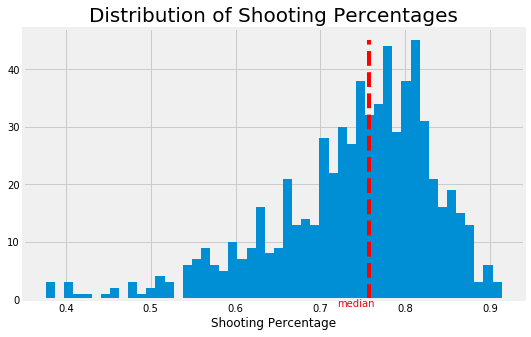

In [17]:
shooting.percentage.hist(bins=50, figsize=(8,5))

plt.title("Distribution of Shooting Percentages", fontsize=20)
plt.xlabel("Shooting Percentage")

plt.vlines(x=shooting.percentage.median(), ymin=0, ymax=45, color="red", linestyle="--")
plt.text(x=0.72, y=-1.3, s="median", color="red")

# From above figure:

#1. Most of player's shooting percentage are between 70% and 80%.a nd the meadian is at around 75%.

# Conclusion:

#1. The player, whom free throws shooting percentage are higher than the 80% can be determined as a good shooter.
#2. The player, whom free throws shooting percentage are lower than the 70% can be determined as a bad shooter.

# Now let's find the best ten shooters in the NBA

In [18]:
shooting.sort_values(by="percentage", ascending=False)[:10]

,ft_count,percentage
player,,
Steve Nash,1591,0.913891
Brian Roberts,337,0.910979
Ray Allen,2045,0.903178
Chauncey Billups,2793,0.901540
Peja Stojakovic,455,0.901099
Stephen Curry,2129,0.897605
Brent Barry,172,0.895349
Dirk Nowitzki,4702,0.894938
Eddie House,236,0.894068


# From above table:

#1. Nine out of ten are Point Guards(PG) or Shooting Guards(SG), whom height are below 2m and have good outside scoting.
#2. There is only one big man (height>2m) in the top ten, Dirk Nowitzki (2.13m), however, he is one of the best scorer in the NBA.

# Conclusion:

#1. The shooting percentage is in direct propotional to the player's outside scoting.
#2. The PG nad SG always make the most free throws and with high shooting percentage.

# Question:Will player's height influence the free throws shooting percentage?

# Now let's find the worst ten shooters in the NBA

In [19]:
shooting.sort_values(by="percentage")[:10]

,ft_count,percentage
player,,
Joey Dorsey,162,0.376543
Clint Capela,268,0.376866
Andre Drummond,1459,0.378341
Kyrylo Fesenko,155,0.400000
Ben Wallace,837,0.406213
Jan Vesely,157,0.407643
DeAndre Jordan,2630,0.419392
Lou Amundson,174,0.419540
Josh Boone,478,0.447699


# From above table:

#1. All of the worst shooters are Center(C) amd Power Foward(PF), whom heigh are usually higher than 2m.

# Conclusion:

#1. The player's height is inversely proportional to the free throws shooting percentage.

# Overall:

Due to the free throw is the simplest and most effective method of scoring, all of basketball player should master this skill. Especially, the most valueable players of their respective teams, since they have the ball more often and get also fouled more often.